### Assignment : 1
### Aim
Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.
### Dataset : [https://www.kaggle.com/datasets/vikrishnan/boston-house-prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

### About the Dataset
We will be working on a data set that comes from the real estate industry in Boston (US). This database contains 14 attributes. The target variable refers to the median value of owner-occupied homes in 1000 USD's.

 - CRIM: per capita crime rate by town
 - ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS: proportion of non-retail business acres per town
 - CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX: nitric oxides concentration (parts per 10 million)
 - RM: average number of rooms per dwelling
 - AGE: proportion of owner-occupied units built prior to 1940
 - DIS: weighted distances to five Boston employment centres
 - RAD: index of accessibility to radial highways
 - TAX: full-value property-tax rate per 10,000 USD
 - PTRATIO: pupil-teacher ratio by town
 - B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT: lower status of the population (%)
 - MEDV: Median value of owner-occupied homes in 1000 USD's (Target)

### Importing libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

### Setting values for:
 - Test split size
 - Learning rate
 - Epoch number
 - Batch size

In [ ]:
test_size = 0.2
learning_rate = 0.01
epochs = 150
batch = 10

### Loading dataset

In [ ]:
boston_data = pd.read_csv("https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%206/DSBDAL/A4/boston.csv" )
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Correlation Matrix

<Axes: >

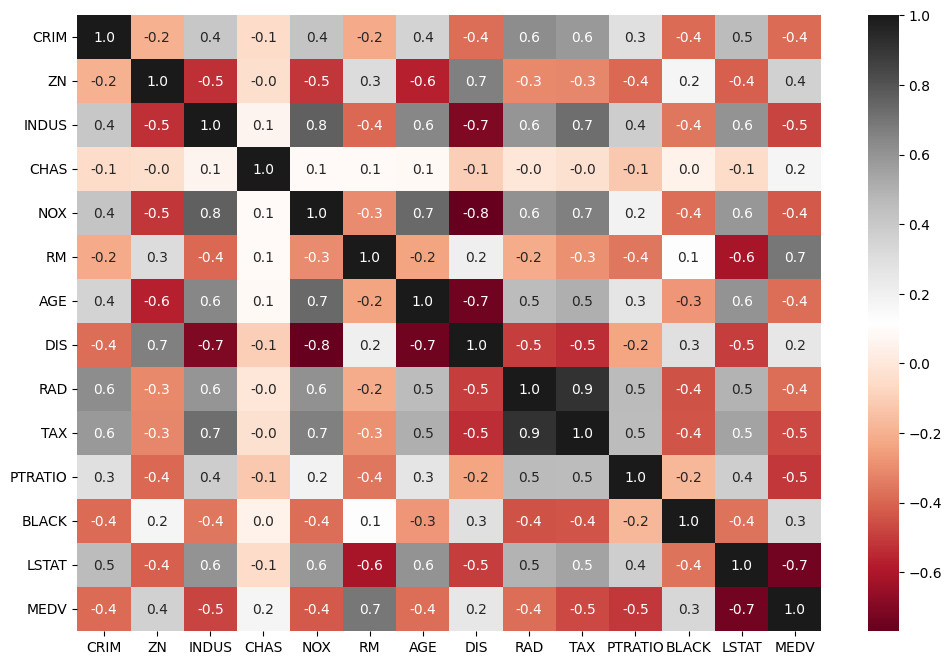

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(boston_data.corr(), cmap = 'RdGy', annot = True, fmt = '.1f')

### Preprocess dataset

In [ ]:
boston_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

### Seperating dependent (y) and independent (x) variables

In [ ]:
X = boston_data.drop('MEDV', axis = 1)
y = boston_data.MEDV

### Splitting training and testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

### Dataset features

In [ ]:
n_features = X.shape[1]
print('Number of features: ', n_features, end='\n\n')
boston_data.dtypes

Number of features:  13



CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
BLACK      float64
LSTAT      float64
MEDV       float64
dtype: object

### Creating and training model

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.MeanSquaredError()
)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch, verbose=True)

Epoch 1/150
41/41 [==============================] - 1s 2ms/step - loss: 1437.1992 - mean_squared_error: 1437.1992
Epoch 2/150
41/41 [==============================] - 0s 2ms/step - loss: 142.9879 - mean_squared_error: 142.9879
Epoch 3/150
41/41 [==============================] - 0s 2ms/step - loss: 113.3713 - mean_squared_error: 113.3713
Epoch 4/150
41/41 [==============================] - 0s 2ms/step - loss: 110.0936 - mean_squared_error: 110.0936
Epoch 5/150
41/41 [==============================] - 0s 2ms/step - loss: 90.4296 - mean_squared_error: 90.4296
Epoch 6/150
41/41 [==============================] - 0s 2ms/step - loss: 69.9885 - mean_squared_error: 69.9885
Epoch 7/150
41/41 [==============================] - 0s 2ms/step - loss: 70.4891 - mean_squared_error: 70.4891
Epoch 8/150
41/41 [==============================] - 0s 2ms/step - loss: 67.9563 - mean_squared_error: 67.9563
Epoch 9/150
41/41 [==============================] - 0s 2ms/step - loss: 59.1387 - mean_squared_error:

### Evaluating model

4/4 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Test vs Prediction')

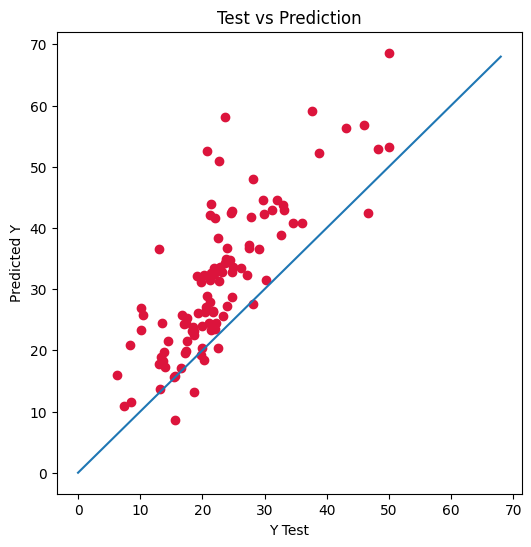

In [ ]:
pred = model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred, c='crimson')
plt.plot(range(int(max(max(y_test), max(pred)[0]))+1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

In [ ]:
print('The MSE value is: ', model.evaluate(X_test, y_test, verbose=False)[0])

The MSE value is:  126.20142364501953
